In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.imagesource {
    font-size: xx-small;
}
</style>
""")

from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')


import os
import networkx as nx

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)
css_styling()

## Transitivity

Social networks are often thought to be characterized by *transitivity* or [triadic closure](https://en.wikipedia.org/wiki/Triadic_closure), which can informally described as the tendency for a person's friends to also be friends with each other.

For example, the picture below shows two sets of three connected nodes. Sets of three connected nodes are called *triads*. The principle of transitivity says that in social networks, Panel B should be much more common than Panel A. In fact, some early researchers called Panel A the "forbidden triad."

<img src="triads.png">


A technical note: we don't distinguish between the triads 1--2--3 and 3--2--1. In other words, the order of the ends of the triad can be swapped. But which node is in the middle of the triad does matter. So the triad 1--2--3 is different from 2--3--1. Therefore, the Panel A above has one triad, while Panel B above has 3 triads. 

**Question** Think about the social processes that lead to forming social network connections (i.e., making friends, confidants, etc). Can you think of any reasons why the process of network formation should make Panel B more common than Panel A in real social networks? 

<div class='response'>
Respond here
</div>

### Clustering coefficients

Now we will look at two closely related ways to measure the extent to which a network exhibits transitivity.

#### First metric: global clustering coefficient

$$C_\text{global} = \frac{3 \times \text{# triangles in network}}{\text{# triads in network}}$$

#### Second metric: local clustering coefficient (defined for each node)

The local clustering coefficient for each node $i$ is

$$c_i = \frac{\text{# triangles centered on $i$}}{\text{# possible edges between $i$'s neighbors}} = \frac{\text{# triangles centered on $i$}}{(1/2)~d_i~(d_i - 1)},$$

where $d_i$ is the degree of node $i$.

If we want to summarize the clustering in an entire network using the local clustering coefficients, we can use the average (local) clustering coefficient, which is

$$C_\text{avg} = \frac{1}{n} \sum_i c_i$$

**Clustering metric example**

<img src="example_network0.png">

**Group question** Fill in the following table, which helps you compute each individual node's local clustering coefficient. Then find the average clustering coefficient.


|             |  degree | # triangles |  $c_i$ |
|   :----:    |  :---:  |  :---:      |  :---:  |
|   node 1    |    2    |    1        |    1    |
|   node 2    |    1    |    0        |    0    |
|   node 3    |    4    |    2        |    1/3  |
|   node 4    |    3    |    2        |    2/3  |
|   node 5    |    2    |    1        |    1    |

<div class='response'>
Average: (1 + 1/3 + 2/3) / 5 = 0.6
</div>

**Group question** How many triads are there in this network? (It may help to list them.) How many triangles?

<div class='response'>
Triads: 11
(1, 3, 2)
(1, 3, 4)
(1, 3, 5)
(1, 4, 3)
(1, 4, 5)
(2, 3, 4)
(2, 3, 5)
(3, 1, 4)
(3, 4, 5)
(3, 5, 4)
(4, 3, 5)

Triangles: 2
</div>

**Group question** What is the transitivity?

<div class='response'>
Transitivity: 3 * 2 / 11 = 0.5454545454545454
</div>

In [151]:
3 * 2 / 11

0.5454545454545454

#### [Random partner selection]

**Question** Write down your partner's name and hometown.

<div class='response'>
Answer here
</div>

#### Example with partner

The next few question refer to the following example network:

<img src="example_network_clustering.png">

**Question** Fill in the table below with the clustering coefficient for each node:

|             |  degree | # triangles |  $c_i$ |
|   :----:    |  :---:  |  :---:      |  :---:  |
|   node 1    |    ?    |    ?        |    ?    |
|   node 2    |    ?    |    ?        |    ?    |
|   node 3    |    ?    |    ?        |    ?    |
|   node 4    |    ?    |    ?        |    ?    |
|   node 5    |    ?    |    ?        |    ?    |
|   node 6    |    ?    |    ?        |    ?    |
|   node 7    |    ?    |    ?        |    ?    |
|   node 8    |    ?    |    ?        |    ?    |


**Question** What is the average local clustering coefficient? 
<div class='response'>
Answer here
</div>

**Question** How many triads are there in the example network? What is the transitivity? 

<div class='response'>
Triads:
Answer here

Transitivity:
Answer here
</div>

**Question** Now check your answers by using the functions `nx.average_clustering` and `nx.transitivity`.

In [112]:
test = nx.Graph(...)

In [3]:
# average clustering check

In [4]:
# transitivity check

## Clustering and transitivity in the Add Health networks

Now we'll examine whether or not triadic closure really is a feature of social networks by studying the Add Health friendship networks.

First, we'll re-use some code from a previous lab to read the Add Health networks into memory:

In [4]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("data", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

In [6]:
number_add_health_networks = 84
add_health_networks = [read_add_health_network(x) for x in range(1,number_add_health_networks+1)]

**Question** Following the pattern of earlier labs, write a loop that goes through each of the 84 Add Health networks and, for each one, calculates the following quantities:

* `num_nodes` - number of nodes
* `avg_degree` - average degree
* `num_components` - number of components
* `average_clustering` - the average individual clustering coefficient
* `transitivity` - the transitivity

Store your results in a `Table` called `add_health`.

In [131]:
...
...
...

**Question** Make two histograms that show the distribution of the average clustering coefficient and the transitivity across the 84 Add Health networks. What is the mean of each metric? 

In [ ]:
...

**Question** Write a sentence that interprets the average clustering coefficient in words (ie, 'the average clustering coefficient is X, which means...').

<div class='response'>
Answer here
</div>

Remember that we're interested in evaluating this theory that triadic closure is common in social networks. But we have two different ways of measuring triadic closure: average clustering and transitivity.
We might worry that our results will differ depending on which of the two metrics we focus on.

Let's take advantage of the fact that we have 84 different social networks in the Add Health dataset to see if these two metrics appear to pick up different aspects of network structure.

**Question** Do you think that average clustering and transitivity measure network structure in similar ways, or do you think they capture different things? In other words, if you make a scatter plot comparing these two metrics across the 84 Add Health datasets, do you expect to find (1) no relationship; (2) a positive relationship; (3) a negative relationship; or (4) something else?

<div class='response'>
Respond here
</div>

**Question** Now make a scatter plot comparing average clustering and transitivity across the 84 Add Health networks.

**Question** What do you conclude about how similar/different these two metrics are?

<div class='response'>
Respond here
</div>

**Question** Now think about how the different metrics of clustering might change as the network goes from having relatively few nodes to relatively many nodes. Discuss with your partner whether you think clustering is most likely to (1) have no relationship to network size; (2) have a positive relationship with network size; (3) have a negative relationship with network size; or (4) something else.

<div class='response'>
Answer here
</div>

**Question** Now make a scatter plot to check your prediction. (You can use either the average clustering or the transitivity.) What do you find?

**Question** Finally, think about how the different metrics of clustering might change as the network goes from having relatively low average degree to a relatively high average degree. Discuss with your partner whether you think clustering is most likely to (1) have no relationship to average degree; (2) have a positive relationship with average degree; (3) have a negative relationship with average degree; or (4) something else.

<div class='response'>
Answer here
</div>

**Question** Now make a scatter plot to check your prediction. Were you right? What do you conclude from the plot?

<div class='response'>
Answer here
</div>

## Comparing a network to a model

OK, so we have been able to calculate the transitivity and average clustering coefficient for all 84 Add Health networks. However, it is a little hard to know whether the results we have seen are consistent with the theory that triadic closure is common in social networks. Why? Because the theory really says that triadic closure should be more common in social networks *than in otherwise similar random networks*.

In this section of the lab, we're going to address the theory more directly by generating random networks and comparing them to the Add Health networks. Thus, we will be able to see whether the clustering in Add Health networks looks typical of otherwise similar random networks, or whether it is different.

### First model: ER random network

First, we'll need to write a function that will help us simulate Erdos-Renyi random networks.

Remember from last class that the average degree, $\bar{d}$, can be written as

$$\bar{d} = p(n-1),$$ 

so, solving for $p$, we get

$$p = \frac{\bar{d}}{(n-1)}.$$

It will turn out to be helpful to be able to generate a random network by specifying the average degree instead of the parameter $p$.

**Question** Write a function that takes a number of nodes and an average degree and returns an ER graph generated using the appropriate value of $p$.

In [17]:
def er_by_degree(...):
    return(...)

**Question** Check that your function works by using it to simulate 100 networks with $n=1000$ and average degree of 5. Calculate the average of the average degrees of the 1000 resulting networks and plot a histogram that shows the distribution of the average degree across the 1000 networks.

mean sim dbar:  4.98562


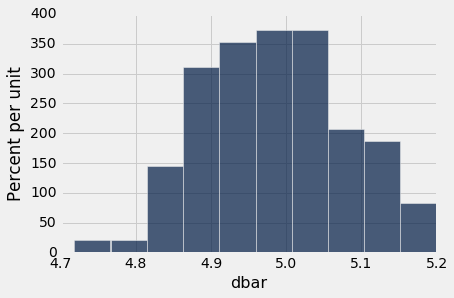

In [163]:
...
...
...

Now we're going to write a simulation study to look at the average clustering coefficient in ER networks. Since we saw above that there appears to be a relationship between the number of nodes and the clustering coefficient, we'll simulate ER networks with different numbers of nodes.

**Question** Write a simulation that simulates ER random networks for varying numbers of nodes from 100 up to 2000 in steps of 100. Fix the average degree at the average degree across all 84 Add Health networks.
Save your results in a Table called `results` which has two columns: `num_nodes` and `average_clustering`. Be sure to generate a few (say 5) different ER networks for each combination of parameters.

*[HINT: code from last week's lab will be helpful as a pattern here]*

In [160]:
...
...
...

**Question** Now make a scatterplot that shows the number of nodes (x axis) and the average clustering coefficient (y axis).

In [ ]:
...

**Question** Compare these results to the scatter plot you made above using the Add Health data. What do you conclude?

**[Challenge Question]** Try to make a single scatter plot that shows the results from your ER simulation in one color and the results from the Add Health networks in another color. This is the clearest way to compare these two sets of results.

In [ ]:
...
...

### Comparing a specific network to the ER model

Above, we used the average degree across all Add Health networks and looked at the relationship between clustering and number of nodes. We saw that (1) the qualitative pattern in the ER networks was similar to the Add Health networks; but (2) that the level of clustering is higher in Add Helath networks than in the ER networks.

Now we're going to focus on one specific Add Health network. We'll simulate a bunch of ER networks that have the same average degree and number of nodes as that specific Add Health network. Then we'll compare the distribution of ER networks to the value we see in the specific Add Health network.

First, it will be helpful to write another function. 

**Question** Write a function called `rand_er_network` that takes a network (called `network`) as its argument and returns a randomly generated ER network that has the same number of nodes and average degree as `network`.

In [ ]:
def rand_er_network(...):
    ...

**Question** Pick a specific Add Health network and generate 500 ER random networks with matching numbers of nodes and average degree. Calculate the average clustering for each of the 500 ER random networks. Then plot the distribution of the results.

In [ ]:
# of course, you could also pick any of the add health networks;
# we'll look at the first one here
add_health_net = add_health_networks[0]

print("Clustering coef. in add health network: ", nx.average_clustering(add_health_net))

...
...
...

results.hist('average_clustering')

**Question** Now calculate the average clustering for the Add Health network. Where would it be in the distribution of ER results? Would it be a pretty typical value or is it extreme?

<div class='response'>
Answer here
</div>

## Submit the lab

You're almost done! Now please create a pdf version of your completed lab by **either**:

* printing your notebook to a pdf file
* going to the Jupyter 'File' menu, choosing 'Download as' and then 'PDF via LaTeX (.pdf)'. 

Please save the resulting .pdf on your computer and then **submit the .pdf on bcourses**.

**The lab must be submitted by the end of the day on Monday, Oct. 17. Late labs will not be accepted.**